In [1]:
# The Title of the  dataset is diabeties and in this dataset we have to predict ,
# if the piatients has diabetes or not we have to perform Classification on this dataset.

In [2]:
# install the library 
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [3]:
#To load dataset kaggle_diabetes
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [4]:
#to see null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

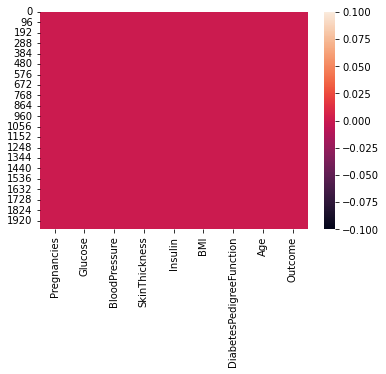

In [5]:
#to see null values visually
sb.heatmap(df.isnull())
plt.show()

In [6]:
#to see datatypes
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
#to see no of rows and columns
df.shape

(2000, 9)

In [8]:
#to see duplicates
df.duplicated().sum()

1256

In [9]:
#to remove duplicte entries
df.drop_duplicates(inplace=True)
df.shape

(744, 9)

In [10]:
#to see data is balanced or not
df['Outcome'].unique(),df['Outcome'].value_counts()

(array([1, 0], dtype=int64),
 0    491
 1    253
 Name: Outcome, dtype: int64)

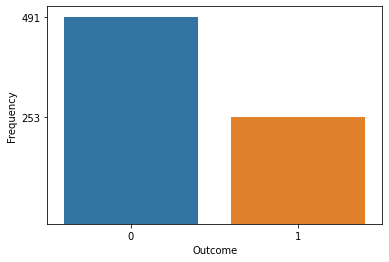

In [11]:
#to see this visually using countplot
sb.countplot(data=df,x='Outcome')
f=df['Outcome'].value_counts()
plt.yticks(f)
plt.ylabel('Frequency')
plt.show()

In [12]:
#we can see that data is balanced

In [13]:
#to select input and output
x=df.drop('Outcome',axis=1) #input selection
y=df['Outcome'] #output selection

In [14]:
#to see input selected properly or not
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,138,62,35,0,33.6,0.127,47
1,0,84,82,31,125,38.2,0.233,23
2,0,145,0,0,0,44.2,0.630,31
3,0,135,68,42,250,42.3,0.365,24
4,1,139,62,41,480,40.7,0.536,21


In [15]:
#to apply train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.3)

In [16]:
#to see the distribution of data for training and testing
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((520, 8), (224, 8), (520,), (224,))

In [17]:
#to apply StandardScaler
from sklearn.preprocessing import StandardScaler
#to create an object
ss=StandardScaler()
#to apply
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [18]:
#to see whether Standard Scaling worked or not
x_train

array([[ 1.62628812,  0.7466635 ,  0.96705091, ..., -0.23202162,
         0.92304681,  1.76483205],
       [-0.80118177, -1.56480967,  0.47297892, ...,  0.13489176,
        -0.15383619, -1.03654211],
       [ 1.32285439,  0.15317715,  0.96705091, ...,  0.8054576 ,
        -0.37908679,  1.41466028],
       ...,
       [ 2.84002307,  0.15317715,  1.06586531, ...,  1.4254147 ,
         0.34294938,  0.80185968],
       [ 0.10911944,  1.55880273,  0.17653572, ...,  1.45071907,
         0.02204441, -0.5988274 ],
       [ 1.62628812, -0.59648983,  0.37416452, ...,  0.09693521,
         0.5959706 ,  1.15203145]])

In [19]:
#to create confusion_matrix and classification_report
from sklearn.metrics import confusion_matrix,classification_report

In [20]:
#create a function 
def create_model(model): #model is user defined which holds the object of algo
    #train the model
    model.fit(x_train,y_train)
    #test the data
    y_pred=model.predict(x_test)
    #Generate report
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    return model

# Logistic Regression

In [21]:
#to apply LogisticRegression 
from sklearn.linear_model import LogisticRegression
#create an object
lr=LogisticRegression()
#call function
lr=create_model(lr)

[[134  20]
 [ 28  42]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       154
           1       0.68      0.60      0.64        70

    accuracy                           0.79       224
   macro avg       0.75      0.74      0.74       224
weighted avg       0.78      0.79      0.78       224



# Decision Tree(Gini)

In [22]:
#perform DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
#to create an object
dt=DecisionTreeClassifier(random_state=1) #by default gini index method
#call function
dt=create_model(dt)

[[105  49]
 [ 34  36]]
              precision    recall  f1-score   support

           0       0.76      0.68      0.72       154
           1       0.42      0.51      0.46        70

    accuracy                           0.63       224
   macro avg       0.59      0.60      0.59       224
weighted avg       0.65      0.63      0.64       224



In [23]:
dict={'Input':x.columns,'IG':dt.feature_importances_}
df1=pd.DataFrame(dict)
df1.sort_values('IG',ascending=False,ignore_index=True)

,Input,IG
0,Glucose,0.302360
1,BMI,0.166217
2,DiabetesPedigreeFunction,0.165793
3,Age,0.142351
4,BloodPressure,0.077491
5,Pregnancies,0.069794
6,SkinThickness,0.045129
7,Insulin,0.030865


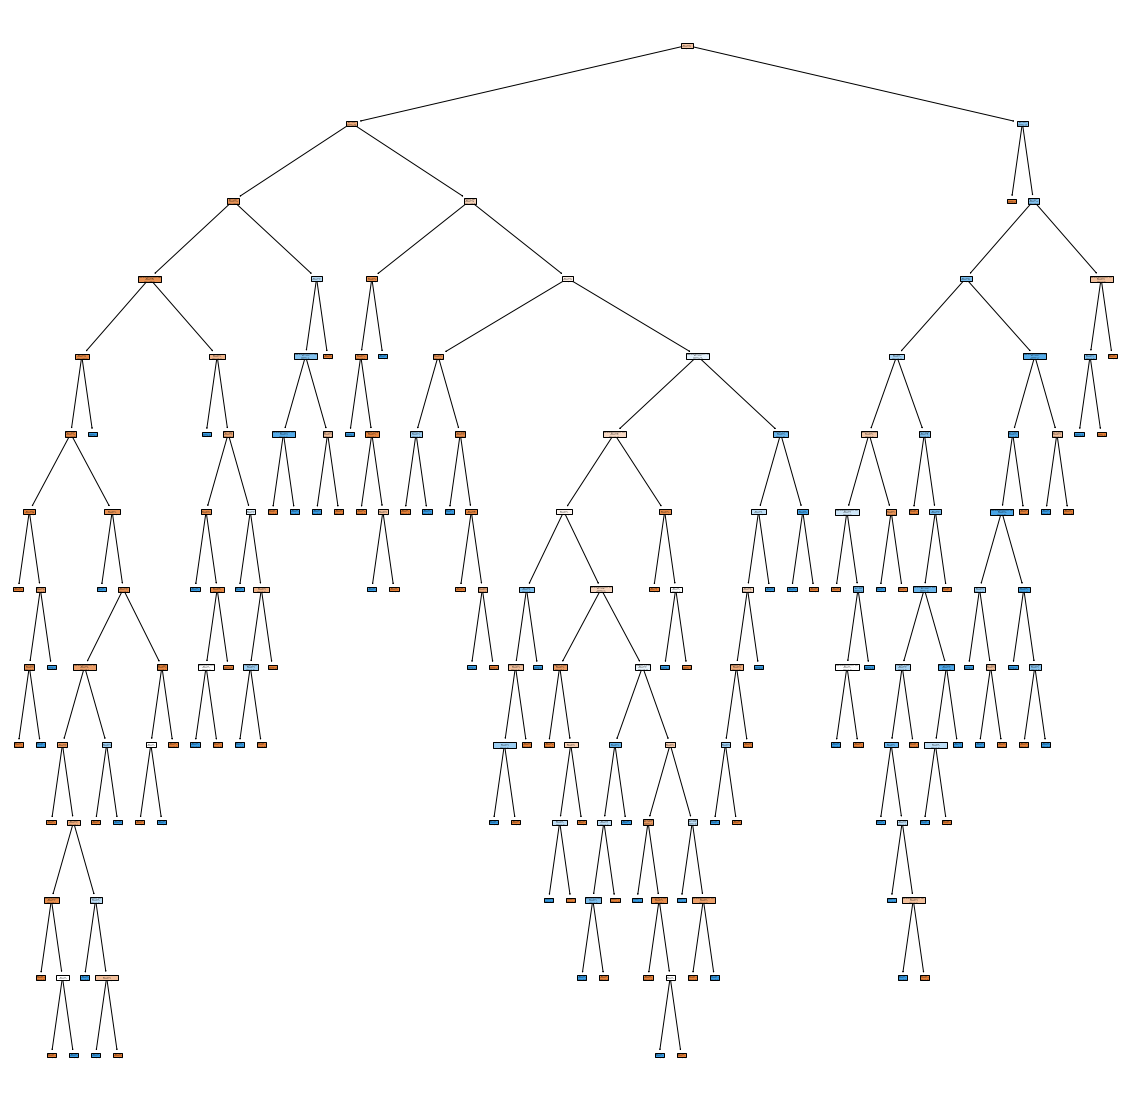

In [24]:
#create a tree
from sklearn import tree
features=x.columns
plt.figure(figsize=(20,20))
_=tree.plot_tree(dt,feature_names=features,filled=True)

# Max_depth(Gini index)

In [25]:
#to see with max_depth (pruning technique)
dt1=DecisionTreeClassifier(random_state=1,max_depth=4)
#call function
dt1=create_model(dt1)

[[104  50]
 [ 14  56]]
              precision    recall  f1-score   support

           0       0.88      0.68      0.76       154
           1       0.53      0.80      0.64        70

    accuracy                           0.71       224
   macro avg       0.70      0.74      0.70       224
weighted avg       0.77      0.71      0.72       224



In [26]:
dict={'Input':x.columns,'IG':dt1.feature_importances_}
df2=pd.DataFrame(dict)
df2.sort_values('IG',ascending=False,ignore_index=True)

,Input,IG
0,Glucose,0.565596
1,BMI,0.209823
2,Age,0.140294
3,DiabetesPedigreeFunction,0.064486
4,Insulin,0.019802
5,Pregnancies,0.000000
6,BloodPressure,0.000000
7,SkinThickness,0.000000


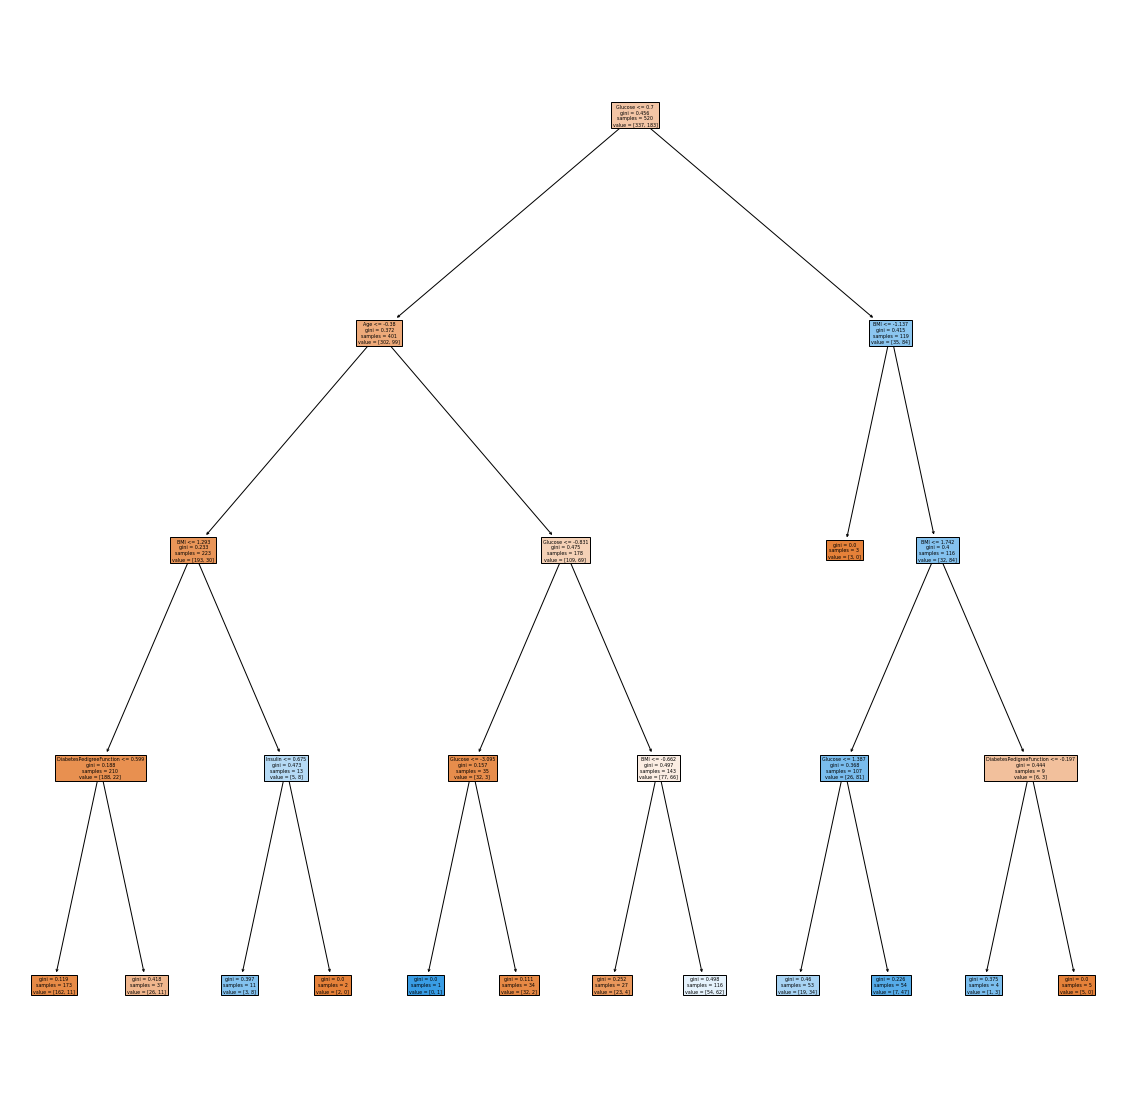

In [27]:
#create a tree
from sklearn import tree
features=x.columns
plt.figure(figsize=(20,20))
_=tree.plot_tree(dt1,feature_names=features,filled=True)

# Min_samples_leaf(Gini index)

In [28]:
#to see with min_samples_leaf
dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=46)
#call function
dt2=create_model(dt2)

[[120  34]
 [ 22  48]]
              precision    recall  f1-score   support

           0       0.85      0.78      0.81       154
           1       0.59      0.69      0.63        70

    accuracy                           0.75       224
   macro avg       0.72      0.73      0.72       224
weighted avg       0.76      0.75      0.75       224



In [29]:
dict={'Input':x.columns,'IG':dt2.feature_importances_}
df3=pd.DataFrame(dict)
df3.sort_values('IG',ascending=False,ignore_index=True)

,Input,IG
0,Glucose,0.678041
1,Age,0.176418
2,BMI,0.133825
3,DiabetesPedigreeFunction,0.011716
4,Pregnancies,0.000000
5,BloodPressure,0.000000
6,SkinThickness,0.000000
7,Insulin,0.000000


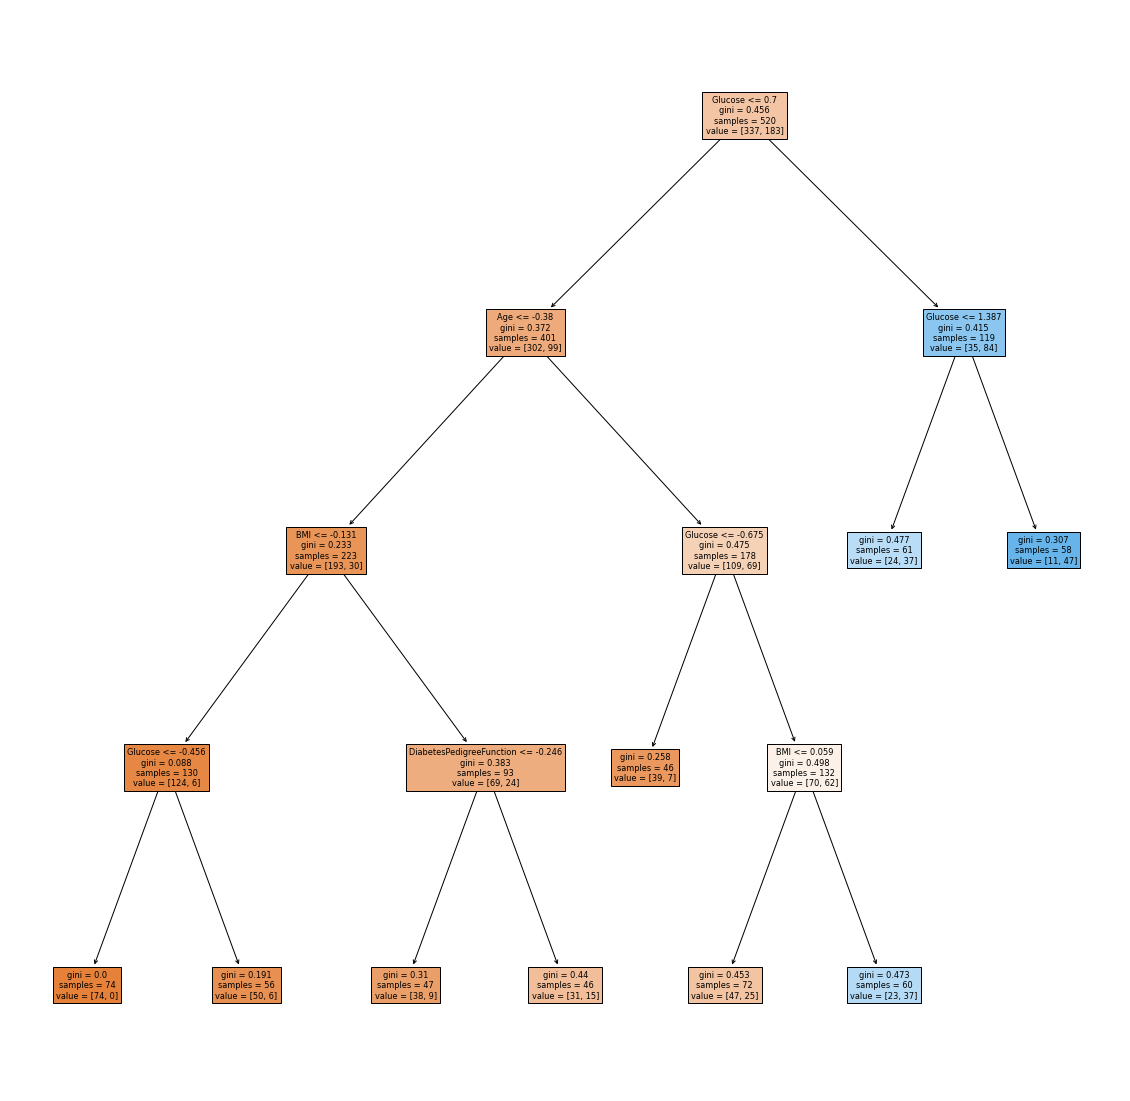

In [30]:
#create a tree
from sklearn import tree
features=x.columns
plt.figure(figsize=(20,20))
_=tree.plot_tree(dt2,feature_names=features,filled=True)

# Decison Tree(Entropy)

In [31]:
#to create an object
dt=DecisionTreeClassifier(random_state=1,criterion='entropy') #by default gini index method
#call function
dt=create_model(dt)

[[127  27]
 [ 32  38]]
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       154
           1       0.58      0.54      0.56        70

    accuracy                           0.74       224
   macro avg       0.69      0.68      0.69       224
weighted avg       0.73      0.74      0.73       224



In [32]:
dict={'Input':x.columns,'IG':dt.feature_importances_}
df1=pd.DataFrame(dict)
df1.sort_values('IG',ascending=False,ignore_index=True)

,Input,IG
0,Glucose,0.236065
1,BMI,0.165551
2,Age,0.160368
3,DiabetesPedigreeFunction,0.133861
4,SkinThickness,0.127734
5,BloodPressure,0.095186
6,Pregnancies,0.041324
7,Insulin,0.039911


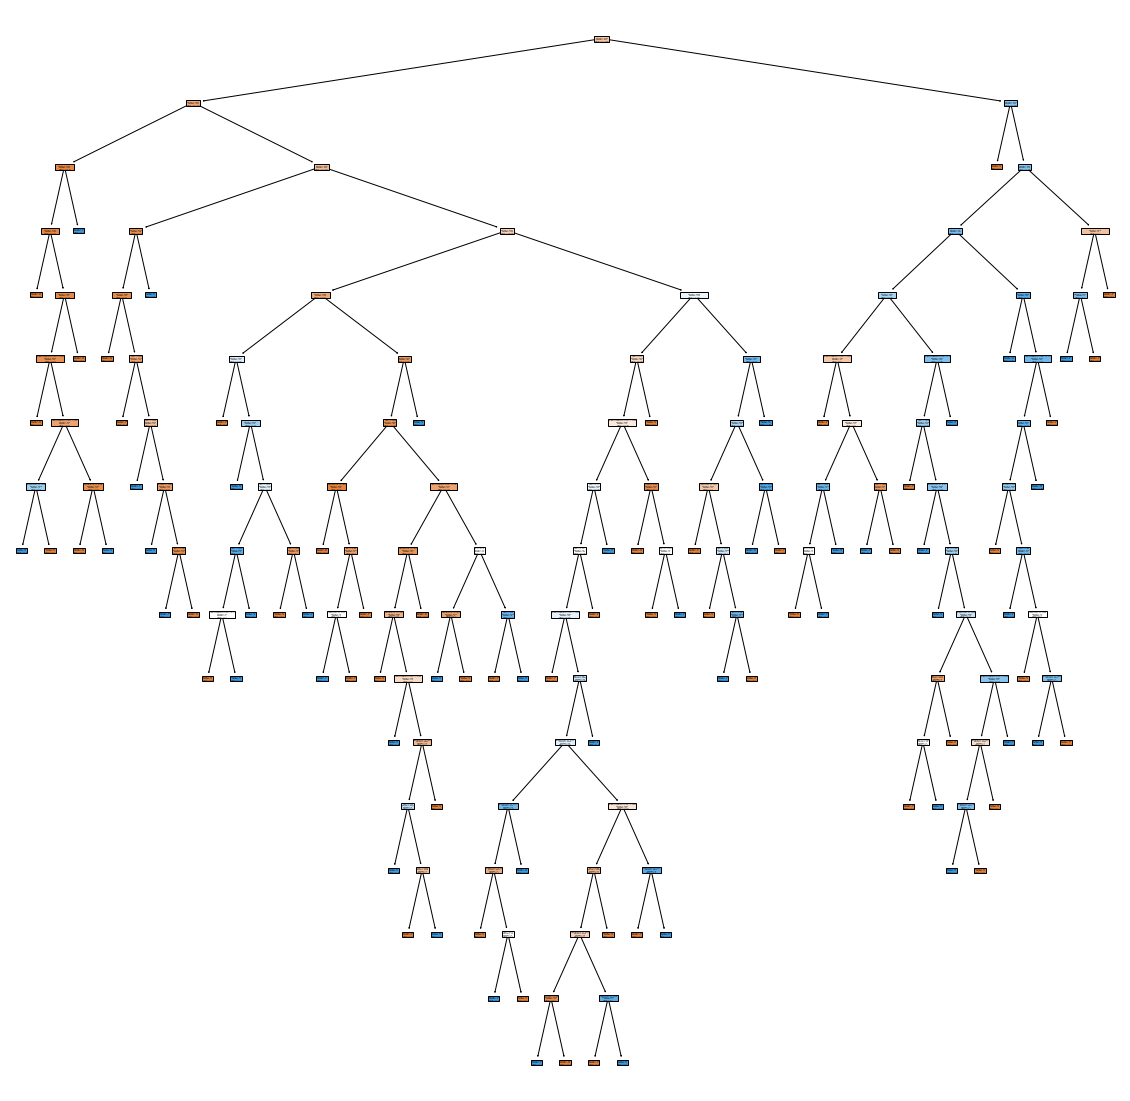

In [33]:
#create a tree
from sklearn import tree
features=x.columns
plt.figure(figsize=(20,20))
_=tree.plot_tree(dt,feature_names=features,filled=True)

# Max_depth(Entropy)

In [34]:
#apply max_depth with entropy method
dt1=DecisionTreeClassifier(random_state=1,criterion='entropy',max_depth=4)
#call function
dt1=create_model(dt1)

[[107  47]
 [ 15  55]]
              precision    recall  f1-score   support

           0       0.88      0.69      0.78       154
           1       0.54      0.79      0.64        70

    accuracy                           0.72       224
   macro avg       0.71      0.74      0.71       224
weighted avg       0.77      0.72      0.73       224



In [35]:
dict={'Input':x.columns,'IG':dt1.feature_importances_}
df2=pd.DataFrame(dict)
df2.sort_values('IG',ascending=False,ignore_index=True)

,Input,IG
0,Glucose,0.515251
1,BMI,0.261316
2,Age,0.092256
3,Insulin,0.044242
4,DiabetesPedigreeFunction,0.031642
5,SkinThickness,0.031006
6,Pregnancies,0.024288
7,BloodPressure,0.000000


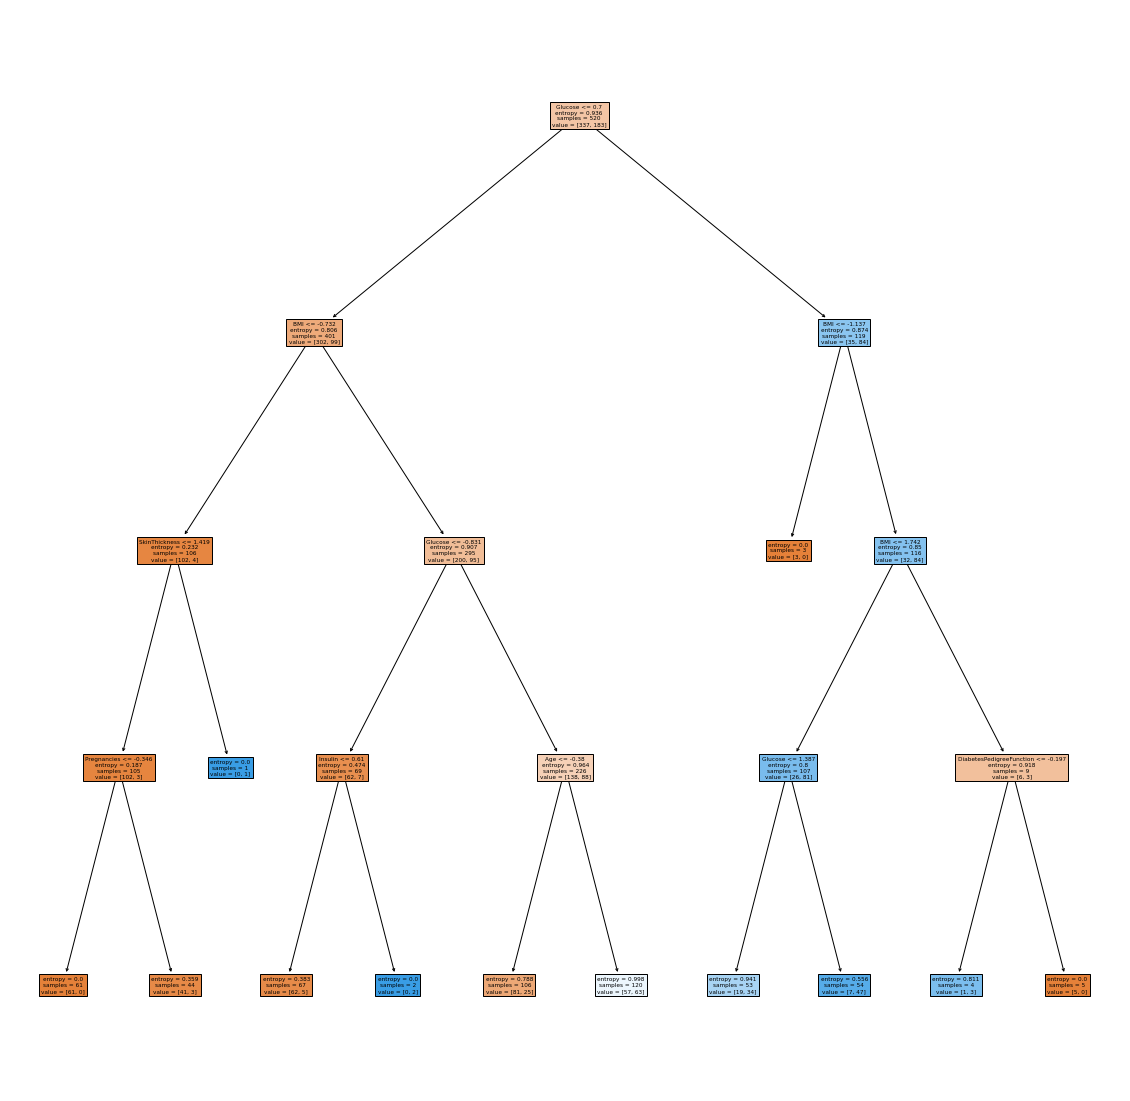

In [36]:
#create a tree
from sklearn import tree
features=x.columns
plt.figure(figsize=(20,20))
_=tree.plot_tree(dt1,feature_names=features,filled=True)

# Min_samples_leaf(Entropy)

In [37]:
#now lets see with min_samples_leaf
#create object of DecisionTreeClassifier class 
dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=70,criterion='entropy') 

    #call function
dt2=create_model(dt2)

[[113  41]
 [ 14  56]]
              precision    recall  f1-score   support

           0       0.89      0.73      0.80       154
           1       0.58      0.80      0.67        70

    accuracy                           0.75       224
   macro avg       0.73      0.77      0.74       224
weighted avg       0.79      0.75      0.76       224



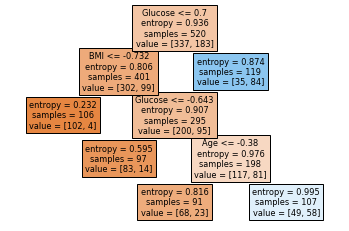

In [38]:
#create a tree
from sklearn import tree
features=x.columns
#plt.figure(figsize=(20,20))
_=tree.plot_tree(dt2,feature_names=features,filled=True)

In [39]:
dict={'Input':x.columns,'IG':dt.feature_importances_}
df3=pd.DataFrame(dict)
df3.sort_values('IG',ascending=False,ignore_index=True)

,Input,IG
0,Glucose,0.236065
1,BMI,0.165551
2,Age,0.160368
3,DiabetesPedigreeFunction,0.133861
4,SkinThickness,0.127734
5,BloodPressure,0.095186
6,Pregnancies,0.041324
7,Insulin,0.039911


# ENSEMBLING TECHNIQUE: RANDOM FOREST TREE

In [66]:
#call random forest tree from package use gini index
from sklearn.ensemble import RandomForestClassifier
#create a object of RandomForestClassifier class()
rfc=RandomForestClassifier(n_estimators=23,random_state=1)
#estimators means how many decisiontreeclassifiers min=10 ,max=100
#max_features means take how many inputs
#bydefalut it took GINI INDEX
'''
for i in range(1,101):
    rfc=RandomForestClassifier(n_estimators=i,random_state=1)
    print('rfc',i)'''

#call the function    
rfc=create_model(rfc)

[[130  24]
 [ 22  48]]
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       154
           1       0.67      0.69      0.68        70

    accuracy                           0.79       224
   macro avg       0.76      0.76      0.76       224
weighted avg       0.80      0.79      0.80       224



In [41]:
# use rfc(Entropy)

'''for i in range(1,101):
    #create object for RandomForestClassifier class
    rfc=RandomForestClassifier(n_estimators=i,random_state=1,criterion="entropy")
    print("no of features:",i)
    #call the function
    rfc=create_model(rfc)'''


rfc=RandomForestClassifier(n_estimators=67,random_state=1,criterion="entropy")
#call the function
rfc=create_model(rfc)

[[127  27]
 [ 22  48]]
              precision    recall  f1-score   support

           0       0.85      0.82      0.84       154
           1       0.64      0.69      0.66        70

    accuracy                           0.78       224
   macro avg       0.75      0.76      0.75       224
weighted avg       0.79      0.78      0.78       224



In [42]:
# RandomForestClassifier with Gini index we have an output for 0=84% and 1=69%
# RandomForestClassifier with Entropy we have an output for 0=82% and 1=69%
# So we take randomForestClassifier(Gini) index as a selected algo

# Boosting:- AdaBoost

In [43]:
# Apply Ada Boost on the dataset
from sklearn.ensemble import AdaBoostClassifier

In [44]:
# create object of AdaBoostClassifier class
ada=AdaBoostClassifier(random_state=1,n_estimators=5)

    # call function 
ada=create_model(ada)
'''for i in range(1,10):
    #create object for RandomForestClassifier class
    ada=AdaBoostClassifier(n_estimators=i,random_state=1)
    print("no of descision stump:",i)
    #call the function
    ada=create_model(ada)'''

[[131  23]
 [ 31  39]]
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       154
           1       0.63      0.56      0.59        70

    accuracy                           0.76       224
   macro avg       0.72      0.70      0.71       224
weighted avg       0.75      0.76      0.75       224



'for i in range(1,10):\n    #create object for RandomForestClassifier class\n    ada=AdaBoostClassifier(n_estimators=i,random_state=1)\n    print("no of descision stump:",i)\n    #call the function\n    ada=create_model(ada)'

In [45]:
# AdaBoost :- recall function :- 0=85% and 1=56%

# Gradient Boost

In [46]:
# Apply Gradient on the data set 
from sklearn.ensemble import GradientBoostingClassifier

In [47]:
# create object of GradientBoostingClassifier class
gbc=GradientBoostingClassifier(random_state=1,n_estimators=75)
'''
for i in range(1,101):
    gbc=GradientBoostingClassifier(random_state=1,n_estimators=i)
    print('gbc',i)'''
    # call function
gbc=create_model(gbc)

[[128  26]
 [ 25  45]]
              precision    recall  f1-score   support

           0       0.84      0.83      0.83       154
           1       0.63      0.64      0.64        70

    accuracy                           0.77       224
   macro avg       0.74      0.74      0.74       224
weighted avg       0.77      0.77      0.77       224



In [48]:
# Gradient Boost :- recall function:- 0=83% and 1=64%

# Extreme Gradient Boost

In [49]:
# Apply extreme gradient boost 
!pip install xgboost

In [50]:
# call the xgb package
from xgboost import XGBClassifier

In [51]:
# create object of xgb classifier
xgc=XGBClassifier(n_estimators=11,reg_alpha=1,random_state=1)

'''for i in range(1,50):
    xgc=XGBClassifier(n_estimators=i,reg_alpha=1,random_state=1)
    print('xgc',i)'''
    # call function
xgc=create_model(xgc)

[[124  30]
 [ 23  47]]
              precision    recall  f1-score   support

           0       0.84      0.81      0.82       154
           1       0.61      0.67      0.64        70

    accuracy                           0.76       224
   macro avg       0.73      0.74      0.73       224
weighted avg       0.77      0.76      0.77       224



In [52]:
# extreme gradient function :- recall :- for 0=81% and 1=67%

# SVM

In [53]:
# call the SVM package
from sklearn.svm import LinearSVC

In [54]:
# create object of LinearSVC class
svc=LinearSVC(random_state=1)  # hard margin

# call function
svc=create_model(svc)

[[136  18]
 [ 30  40]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       154
           1       0.69      0.57      0.62        70

    accuracy                           0.79       224
   macro avg       0.75      0.73      0.74       224
weighted avg       0.78      0.79      0.78       224



In [55]:
# Now the model is underfit so we add external error 
# create a object of LinearSVC class with external error 
svc1=LinearSVC(random_state=1,C=0.9)
# added some error on training time with the help of C
# call model
svc1=create_model(svc1)

[[136  18]
 [ 30  40]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       154
           1       0.69      0.57      0.62        70

    accuracy                           0.79       224
   macro avg       0.75      0.73      0.74       224
weighted avg       0.78      0.79      0.78       224



In [56]:
# Here there is no effect on recall even if error increase or decrease.
# so we concluded that the data is not a linearly separatable means the data is non-linear 
# then we use polynomial kernal function .It is used for non-linearly data .

In [57]:
# Ploynomial kernal
from sklearn.svm import SVC
# SVC is a inbuilt class for non-linearly data 

In [58]:
# create object of SVC class(for polynomial)
svc2=SVC(random_state=1,kernel="poly")

# call function
svc2=create_model(svc2)

[[148   6]
 [ 40  30]]
              precision    recall  f1-score   support

           0       0.79      0.96      0.87       154
           1       0.83      0.43      0.57        70

    accuracy                           0.79       224
   macro avg       0.81      0.69      0.72       224
weighted avg       0.80      0.79      0.77       224



In [59]:
# Radial basis kernal function
svc3=SVC(random_state=1,kernel='rbf')

# call function
svc3=create_model(svc3)

[[134  20]
 [ 28  42]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       154
           1       0.68      0.60      0.64        70

    accuracy                           0.79       224
   macro avg       0.75      0.74      0.74       224
weighted avg       0.78      0.79      0.78       224



In [60]:
# In this radialkernal function domain :- recall :- 0=87% and 1=60%
# In Polynomial kernal function :- recall :- 0=96% and 1=43%
# so we select radial kernal function 

# KNN Algo

In [61]:
from sklearn.neighbors import KNeighborsClassifier

In [62]:
# create object of KNeighborsClassifier class
knc=KNeighborsClassifier(n_neighbors=9,metric='minkowski',p=2)


In [63]:
# call function
knc=create_model(knc)

[[126  28]
 [ 26  44]]
              precision    recall  f1-score   support

           0       0.83      0.82      0.82       154
           1       0.61      0.63      0.62        70

    accuracy                           0.76       224
   macro avg       0.72      0.72      0.72       224
weighted avg       0.76      0.76      0.76       224



In [67]:
# Conclusion:-
# to see what is thye training and testing score of all the Algo we have performed

In [ ]:
# LogisticRegression the score for 0=87% and for 1=60%
# DecisionTreeClassifier Gini index the score we got for 0=68% and 1=51%
    # DecisionTreeClassifier(max_depth(Gini index)) we got the score of for 0=68% and 1=80%
    # DecisionTreeClassifier(min_samples_leaf(Gini index)) we got the score for 0=78% and 1=69%
# DecisionTreeClassifier(Entropy) we got the score for 0=82% and 1=54%
    # Entropy(max_depth) we got the score for 0=69% and for 1=79%
    # Entopy(min_samples_leaf) we got tyhe score for 0=73% and for 1=80%
# Ensembling Technique(Gini index) we have the score of 0=84% and 1=69%
# Ensembling technque(Entropy) we have the score for 0=82% and 1=69%
# AdaBoosting techinique we have received the score for 0=85% and 1=56%
# Gradient Boosting we have the result :- recall :- 0=83% and 1=64%
# extreme gradient function :- recall :- for 0=81% and 1=67%
# SVC(linear) :- recall :- 0=88% and 1=57%
   # SVC(external error) :- recall:- 0=88% and 1=57%
# In this radialkernal function domain :- recall :- 0=87% and 1=60%
# In Polynomial kernal function :- recall :- 0=96% and 1=43%
# so we select radial kernal function 
# Here in KNN Algorithm in this domain we get at n_neighbors=5 for :- recall:- for 0=82% and 1=63%